- Edison Camilo Huérfano Villalba

# Item 1

1. Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math
from collections import defaultdict 

## Gale-Shapley Algorithm

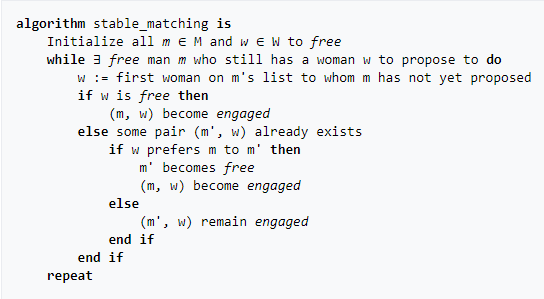

In [2]:
def stableMarriage(women_preferences_dict,men_preferences_dict): 

    n = len(women_preferences_dict)
    # Days and proposals counter 
    days = 0
    proposals = 0
    # Engagements are stored in women_matchings
    women_matchings = defaultdict()

    # Initialize all m ∈ M and w ∈ W to free
    is_free_women = [True for i in range(n)]
    free_men_list = [i+1 for i in range(n)]

    men_preferences_queue = defaultdict()
    for key in men_preferences_dict:
      men_preferences_queue[key] = men_preferences_dict[key][::-1]

    # while ∃ free man m who still has a woman w to propose to do
    while len(free_men_list)>0:

      refused_proposals = []  

      # w := first woman on m's list to whom m has not yet proposed
      for man in free_men_list:
          if men_preferences_queue[man] != []:
            woman = men_preferences_queue[man].pop()
            proposals += 1
          if is_free_women[woman-1]:
              women_matchings[woman] = man
              is_free_women[woman-1] = False
          # else some pair (m', w) already exists
          else: 
              # if w prefers m to m' then m' becomes free and (m, w) become engaged 
              man_it = 0
              fiancee = women_matchings[woman]
              new_matching = False
              while women_preferences_dict[woman][man_it] != fiancee:
                if (women_preferences_dict[woman][man_it] == man):
                  refused_proposals.append(fiancee)
                  women_matchings[woman] = man
                  new_matching = True
                man_it += 1
              if not new_matching: 
                refused_proposals.append(man)
      free_men_list = refused_proposals
      days += 1
    # repeat

    # Check stability
    stabilityChecking(women_matchings,women_preferences_dict,men_preferences_dict)

    # Print engagements
    for match in women_matchings:
       print ("("+str(match)+", "+str(women_matchings[match])+")", end = '  ')
    # print(women_matchings)

    # Print days and proposals counters
    print("\n\nThe matching was completed in "+str(days)+" days/iterations and there were "+str(proposals)+" proposals.")
    

Stability-checking Algorithm

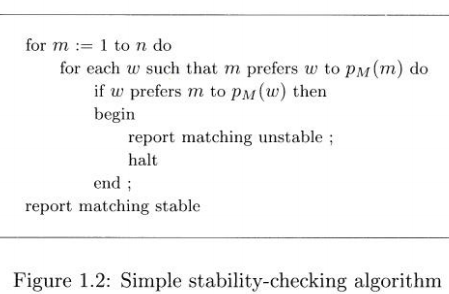

In [3]:
def stabilityChecking(women_matchings, women_preferences_dict, men_preferences_dict):
    
    n = len(women_preferences_dict)
    men_list = [i+1 for i in range(n)]

    # For each man M do
    for man in men_list:

        # 1. Find the matching for the man M
        wife = 1
        for women_key in women_matchings:
          if women_matchings[women_key]==man: 
            wife = women_key
        
        # 2. For each woman W that the man M prefers over his matching do
        woman_it = 0
        while (men_preferences_dict[man][woman_it] != wife):
          man_it = 0

          # If woman W prefers man M over her matching, report unstable matching
          woman = woman_it+1
          husband = women_matchings[woman]
          while women_preferences_dict[woman][man_it] != husband:
            if (women_preferences_dict[woman][man_it] == man):
              print("\nReport unstable matching\n")
              return
            man_it += 1
          woman_it += 1
       
    print("\nThe matching is stable\n")

**Best case n**

In [4]:
# Generata a best case n
def generateBestCase(n):

    # Men and women lists
    men_list = np.arange(1, n+1).tolist()
    women_list = np.arange(1, n+1).tolist()

    # Generate preferences
    women_preferences = defaultdict()
    men_preferences = defaultdict()
    for i in range(n):
      # women preferences
      preferences1 = []
      for j in range(n):
        preferences1.append((j+i)%(n)+1)
      women_preferences[i+1] = preferences1

      # men preferences
      preferences2 = []
      for j in range(n):
        preferences2.append((j+i)%(n)+1)
      men_preferences[i+1] = preferences2

    # Print preferences
    print("Women's Preferences:")
    women_preferences_df = pd.concat({"Op"+str(k): pd.Series([women_preferences[l][k-1] for l in women_preferences.keys()]) for k, v in women_preferences.items()}, axis=1)
    women_preferences_df.index = ["W"+str(k) for k in women_list]
    display(women_preferences_df)
    
    print("\nMen's Preferences:")
    men_preferences_df = pd.concat({"Op"+str(k): pd.Series([men_preferences[l][k-1] for l in men_preferences.keys()]) for k, v in men_preferences.items()}, axis=1)
    men_preferences_df.index = ["M"+str(k) for k in men_list]
    display(men_preferences_df)

    # Find Stable Matching
    stableMarriage(women_preferences,men_preferences)    

**Worst case n**

In [5]:
# Generata a best case n
def generateWorstCase(n):

    # Men and women lists
    men_list = np.arange(1, n+1).tolist()
    women_list = np.arange(1, n+1).tolist()

    # Generate preferences
    women_preferences = defaultdict()
    men_preferences = defaultdict()
    for i in range(n):
      # women preferences
      preferences1 = []
      for j in range(n):
        preferences1.append((j+i+1)%(n)+1)
      women_preferences[i+1] = preferences1

      # men preferences
      preferences2 = []
      for j in range(n-1):
        preferences2.append((j+i)%(n-1)+1)
      preferences2.append(n)
      men_preferences[i+1] = preferences2

    # Print preferences
    print("Women's Preferences:")
    women_preferences_df = pd.concat({"Op"+str(k): pd.Series([women_preferences[l][k-1] for l in women_preferences.keys()]) for k, v in women_preferences.items()}, axis=1)
    women_preferences_df.index = ["W"+str(k) for k in women_list]
    display(women_preferences_df)
    
    print("\nMen's Preferences:")
    men_preferences_df = pd.concat({"Op"+str(k): pd.Series([men_preferences[l][k-1] for l in men_preferences.keys()]) for k, v in men_preferences.items()}, axis=1)
    men_preferences_df.index = ["M"+str(k) for k in men_list]
    display(men_preferences_df)
    
    stableMarriage(women_preferences,men_preferences)

### N = 4

In [6]:
N = 4

In [7]:
generateBestCase(N)

Women's Preferences:


,Op1,Op2,Op3,Op4
W1,1,2,3,4
W2,2,3,4,1
W3,3,4,1,2
W4,4,1,2,3



Men's Preferences:


,Op1,Op2,Op3,Op4
M1,1,2,3,4
M2,2,3,4,1
M3,3,4,1,2
M4,4,1,2,3



The matching is stable

(1, 1)  (2, 2)  (3, 3)  (4, 4)  

The matching was completed in 1 days/iterations and there were 4 proposals.


In [8]:
generateWorstCase(N)

Women's Preferences:


,Op1,Op2,Op3,Op4
W1,2,3,4,1
W2,3,4,1,2
W3,4,1,2,3
W4,1,2,3,4



Men's Preferences:


,Op1,Op2,Op3,Op4
M1,1,2,3,4
M2,2,3,1,4
M3,3,1,2,4
M4,1,2,3,4



The matching is stable

(1, 2)  (2, 3)  (3, 4)  (4, 1)  

The matching was completed in 10 days/iterations and there were 13 proposals.


### N = 40


In [9]:
N = 40

In [10]:
generateBestCase(N)

Women's Preferences:


,Op1,Op2,Op3,Op4,Op5,Op6,Op7,Op8,Op9,Op10,Op11,Op12,Op13,Op14,Op15,Op16,Op17,Op18,Op19,Op20,Op21,Op22,Op23,Op24,Op25,Op26,Op27,Op28,Op29,Op30,Op31,Op32,Op33,Op34,Op35,Op36,Op37,Op38,Op39,Op40
W1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
W2,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1
W3,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2
W4,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3
W5,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4
W6,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5
W7,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6
W8,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7
W9,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8
W10,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9



Men's Preferences:


,Op1,Op2,Op3,Op4,Op5,Op6,Op7,Op8,Op9,Op10,Op11,Op12,Op13,Op14,Op15,Op16,Op17,Op18,Op19,Op20,Op21,Op22,Op23,Op24,Op25,Op26,Op27,Op28,Op29,Op30,Op31,Op32,Op33,Op34,Op35,Op36,Op37,Op38,Op39,Op40
M1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
M2,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1
M3,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2
M4,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3
M5,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4
M6,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5
M7,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6
M8,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7
M9,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8
M10,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9



The matching is stable

(1, 1)  (2, 2)  (3, 3)  (4, 4)  (5, 5)  (6, 6)  (7, 7)  (8, 8)  (9, 9)  (10, 10)  (11, 11)  (12, 12)  (13, 13)  (14, 14)  (15, 15)  (16, 16)  (17, 17)  (18, 18)  (19, 19)  (20, 20)  (21, 21)  (22, 22)  (23, 23)  (24, 24)  (25, 25)  (26, 26)  (27, 27)  (28, 28)  (29, 29)  (30, 30)  (31, 31)  (32, 32)  (33, 33)  (34, 34)  (35, 35)  (36, 36)  (37, 37)  (38, 38)  (39, 39)  (40, 40)  

The matching was completed in 1 days/iterations and there were 40 proposals.


In [11]:
generateWorstCase(N)

Women's Preferences:


,Op1,Op2,Op3,Op4,Op5,Op6,Op7,Op8,Op9,Op10,Op11,Op12,Op13,Op14,Op15,Op16,Op17,Op18,Op19,Op20,Op21,Op22,Op23,Op24,Op25,Op26,Op27,Op28,Op29,Op30,Op31,Op32,Op33,Op34,Op35,Op36,Op37,Op38,Op39,Op40
W1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1
W2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2
W3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3
W4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4
W5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5
W6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6
W7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7
W8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8
W9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9
W10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10



Men's Preferences:


,Op1,Op2,Op3,Op4,Op5,Op6,Op7,Op8,Op9,Op10,Op11,Op12,Op13,Op14,Op15,Op16,Op17,Op18,Op19,Op20,Op21,Op22,Op23,Op24,Op25,Op26,Op27,Op28,Op29,Op30,Op31,Op32,Op33,Op34,Op35,Op36,Op37,Op38,Op39,Op40
M1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
M2,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,1,40
M3,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,1,2,40
M4,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,1,2,3,40
M5,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,1,2,3,4,40
M6,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,1,2,3,4,5,40
M7,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,1,2,3,4,5,6,40
M8,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,1,2,3,4,5,6,7,40
M9,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,40
M10,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,40



The matching is stable

(1, 2)  (2, 3)  (3, 4)  (4, 5)  (5, 6)  (6, 7)  (7, 8)  (8, 9)  (9, 10)  (10, 11)  (11, 12)  (12, 13)  (13, 14)  (14, 15)  (15, 16)  (16, 17)  (17, 18)  (18, 19)  (19, 20)  (20, 21)  (21, 22)  (22, 23)  (23, 24)  (24, 25)  (25, 26)  (26, 27)  (27, 28)  (28, 29)  (29, 30)  (30, 31)  (31, 32)  (32, 33)  (33, 34)  (34, 35)  (35, 36)  (36, 37)  (37, 38)  (38, 39)  (39, 40)  (40, 1)  

The matching was completed in 1522 days/iterations and there were 1561 proposals.


# Item 2
2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [12]:
def stableMarriage_Modified(women_preferences_dict,men_preferences_dict): 

    n = len(women_preferences_dict)
    # Days and proposals counter 
    days = 0
    proposals = 0
    # Engagements are stored in women_matchings
    women_matchings = defaultdict()

    # Initialize all m ∈ M and w ∈ W to free
    is_free_women = [True for i in range(n)]
    free_men_list = [i+1 for i in range(n)]

    men_preferences_queue = defaultdict()
    for key in men_preferences_dict:
      men_preferences_queue[key] = men_preferences_dict[key][::-1]

    # while ∃ free man m who still has a woman w to propose to do
    while len(free_men_list)>0:

      refused_proposals = []  

      # w := first woman on m's list to whom m has not yet proposed
      for man in free_men_list:
          if men_preferences_queue[man] != []:
            woman = men_preferences_queue[man].pop()
            proposals += 1
          if is_free_women[woman-1]:
              women_matchings[woman] = man
              is_free_women[woman-1] = False
          # else some pair (m', w) already exists
          else: 
              # if w prefers m to m' then m' becomes free and (m, w) become engaged 
              man_it = 0
              fiancee = women_matchings[woman]
              new_matching = False
              while women_preferences_dict[woman][man_it] != fiancee:
                if (women_preferences_dict[woman][man_it] == man):
                  refused_proposals.append(fiancee)
                  women_matchings[woman] = man
                  new_matching = True
                man_it += 1
              if not new_matching: 
                refused_proposals.append(man)
      free_men_list = refused_proposals
      days += 1
    # repeat

    # Check stability
    # stabilityChecking(women_matchings,women_preferences_dict,men_preferences_dict)

    # Print engagements
    # print(women_matchings)

    # Return days/iterations
    return days

**Random case n**

In [13]:
# Generata a random case n
def generateRandomCase_GaleShepley(n):

    # Men and women lists
    men_list = np.arange(1, n+1).tolist()
    women_list = np.arange(1, n+1).tolist()

    # Generate random preferences
    women_preferences = defaultdict()
    men_preferences = defaultdict()
    for i in range(n):
      # Random women preferences
      preferences1 = men_list[:]
      rd.shuffle(preferences1)
      women_preferences[i+1] = preferences1

      # Random men preferences
      preferences2 = women_list[:]
      rd.shuffle(preferences2)
      men_preferences[i+1] = preferences2

    # Find Stable Matching
    return stableMarriage_Modified(women_preferences,men_preferences)    

### N = 4

In [14]:
N = 4

The minimum number of iterations (days) was 1

The maximum number of iterations (days) was 7

The average number of iterations (days) was 3.17

The distribution is


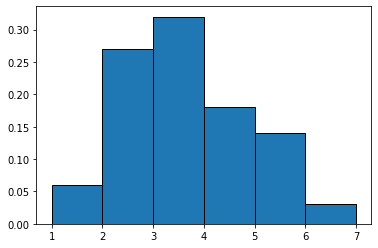

In [15]:
# Run the Gale-Shapley Algorithm 100 times using random permutations
run = 100
minimum = math.inf
maximum = 0
iterations = []
sum = 0
for i in range(run):
  iterations.append(generateRandomCase_GaleShepley(N))
  # print(iterations[i])
  maximum = max(iterations[i],maximum)
  minimum = min(iterations[i],minimum)
  sum += iterations[i]
average = sum/run
print("The minimum number of iterations (days) was "+str(minimum))
print("\nThe maximum number of iterations (days) was "+str(maximum))
print("\nThe average number of iterations (days) was "+str(average))
print("\nThe distribution is")
plt.hist(iterations, 
          bins=max(iterations)-min(iterations), 
          density=True,
          histtype='bar',
          edgecolor='k')
plt.show()

### N = 40

In [16]:
N = 40

The minimum number of iterations (days) was 10

The maximum number of iterations (days) was 165

The average number of iterations (days) was 55.44

The distribution is


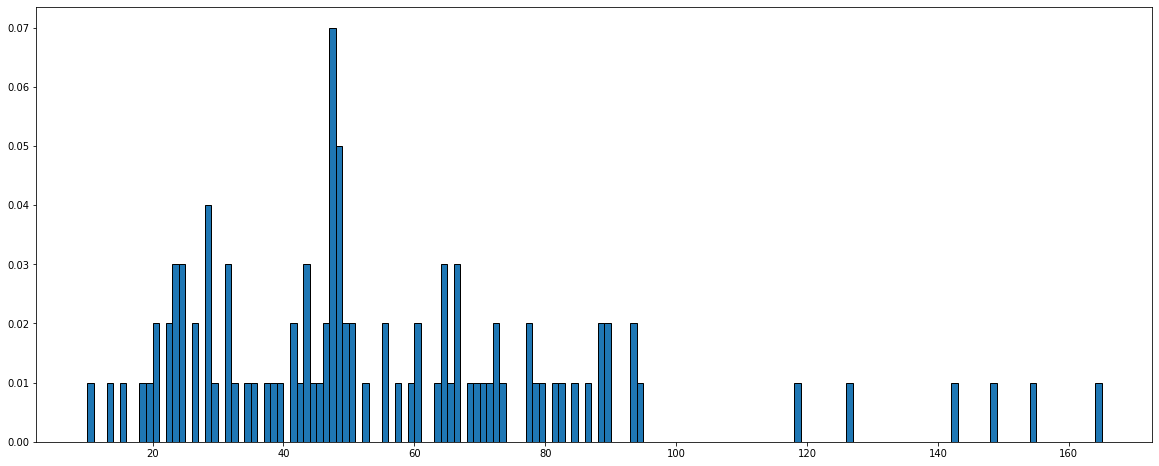

In [17]:
# Run the Gale-Shapley Algorithm 100 times using random permutations
run = 100
minimum = math.inf
maximum = 0
iterations = []
sum = 0
for i in range(run):
  iterations.append(generateRandomCase_GaleShepley(N))
  # print(iterations[i])
  maximum = max(iterations[i],maximum)
  minimum = min(iterations[i],minimum)
  sum += iterations[i]
average = sum/run
print("The minimum number of iterations (days) was "+str(minimum))
print("\nThe maximum number of iterations (days) was "+str(maximum))
print("\nThe average number of iterations (days) was "+str(average))
print("\nThe distribution is")
plt.figure(figsize=(20,8))
plt.hist(iterations, 
          bins=max(iterations)-min(iterations), 
          density=True,
          histtype='bar',
          edgecolor='k')
plt.show()